In [1]:
!pip install keras-tuner

In [120]:
from google.colab import drive
drive.mount('/content/drive')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\IPython\core\interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-120-d5df0069828e>", line 1, in <module>
    from google.colab import drive
ModuleNotFoundError: No module named 'google.colab'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\IPython\core\interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\IPython\core\ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_contex

ModuleNotFoundError: No module named 'google.colab'

In [121]:
# Import our dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import load_model
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [122]:
# Loading the dataset from the resources folder

charity_df = pd.read_csv(Path('charity_data.csv'))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\IPython\core\interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-122-f65d5dc983bc>", line 3, in <module>
    charity_df = pd.read_csv(Path('charity_data.csv'))
  File "C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\io\parsers.py", line 676, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\io\parsers.py", line 448, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\io\parsers.py", line 880, in __init__
    self._make_engine(self.engine)
  File "C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\io\parsers.py", line 1114, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "C:\Users\Uzma\anaconda3\envs\PythonAd

FileNotFoundError: [Errno 2] File charity_data.csv does not exist: 'charity_data.csv'

In [123]:
charity_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,INCOME_LOWER,INCOME_UPPER
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,0,0
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,1,9999
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,10000,24999
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,100000,499999
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0,0,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0,0,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1,0,0


# Exploratory Data Analysis (EDA):

1. Drop the unnamed column as it does not contribute to clustering or add value to input data
2. List the DataFrame's data types to ensure they're aligned to the type of data stored on each column.
3. Is there any column whose data type need to be changed? If so, make the corresponding adjustments.
4. Is there any unnecessary column that needs to be dropped? If so, make the corresponding adjustments.
5. Check for duplicates.
6. In order to use unsupervised learning algorithms, all the features should be numeric, and also, on similar scales.
7. Rename the column if needed.
8. Check for categorical data in columns.
9. Determine the number of unique values for each column.
10. For those columns that have more than 10 unique values, determine the number of data points for each unique value.
11. Use the number of data points for each unique value to pick a cutoff point to bin "rare" categorical variables together in a new value, Other, and then check if the binning was successful.
12. What variable(s) are considered the target(s) for your model?
13. What variable(s) are considered the feature(s) for your model?

In [124]:
charity_df.shape

(34299, 12)

In [125]:
charity_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
INCOME_LOWER              object
INCOME_UPPER              object
dtype: object

In [126]:
# Find null values
for column in charity_df.columns:
    print(f"Column {column} has {charity_df[column].isnull().sum()} null values")


Column APPLICATION_TYPE has 0 null values
Column AFFILIATION has 0 null values
Column CLASSIFICATION has 0 null values
Column USE_CASE has 0 null values
Column ORGANIZATION has 0 null values
Column STATUS has 0 null values
Column INCOME_AMT has 0 null values
Column SPECIAL_CONSIDERATIONS has 0 null values
Column ASK_AMT has 0 null values
Column IS_SUCCESSFUL has 0 null values
Column INCOME_LOWER has 0 null values
Column INCOME_UPPER has 0 null values


In [127]:
# Find duplicate entries
print(f"Duplicate entries: {charity_df.duplicated().sum()}")

Duplicate entries: 24677


In [128]:
# A list of the columns from the original DataFrame
charity_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL', 'INCOME_LOWER', 'INCOME_UPPER'],
      dtype='object')

In [129]:
charity_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL', 'INCOME_LOWER', 'INCOME_UPPER'],
      dtype='object')

In [130]:
charity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
 10  INCOME_LOWER            34299 non-null  object
 11  INCOME_UPPER            34299 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.1+ MB


In [131]:
# Function checking for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [132]:
missing_values_table(charity_df)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Data Preprocessing:

In [133]:
# Drop 'EIN', 'NAME' columns from the dataframe

charity_df = charity_df.drop(['EIN', 'NAME'], axis=1)
charity_df

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\IPython\core\interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-133-edb55cc6852d>", line 3, in <module>
    charity_df = charity_df.drop(['EIN', 'NAME'], axis=1)
  File "C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\frame.py", line 3997, in drop
    errors=errors,
  File "C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\generic.py", line 3936, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\generic.py", line 3970, in _drop_axis
    new_axis = axis.drop(labels, errors=errors)
  File "C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\indexes\base.py", line 5018, in drop
    raise KeyError(f"{labels[mask]} not found in axis")
KeyError: "['EIN' 'NAME'] not fo

KeyError: "['EIN' 'NAME'] not found in axis"

In [134]:
charity_df["INCOME_AMT"]

0                    0
1               1-9999
2                    0
3          10000-24999
4        100000-499999
             ...      
34294                0
34295                0
34296                0
34297                0
34298            1M-5M
Name: INCOME_AMT, Length: 34299, dtype: object

In [135]:
# new data frame with split value columns
charity_df[['INCOME_LOWER','INCOME_UPPER']] = charity_df["INCOME_AMT"].str.split("-", n = 1, expand = True)
charity_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,INCOME_LOWER,INCOME_UPPER
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,0,None
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,1,9999
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0,None
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,10000,24999
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,100000,499999
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0,0,None
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0,None
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0,0,None
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1,0,None


In [136]:
charity_df = charity_df.fillna(0)
charity_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,INCOME_LOWER,INCOME_UPPER
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,0,0
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,1,9999
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,10000,24999
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,100000,499999
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0,0,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0,0,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1,0,0


In [137]:
charity_df['INCOME_UPPER'] = charity_df['INCOME_UPPER'].replace('M','', regex=True)
charity_df['INCOME_LOWER'] = charity_df['INCOME_LOWER'].replace('M','', regex=True)



In [138]:
charity_df["INCOME_LOWER"] 
charity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
 10  INCOME_LOWER            34299 non-null  object
 11  INCOME_UPPER            34299 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.1+ MB


In [139]:
charity_df["INCOME_LOWER"] = charity_df["INCOME_LOWER"].str.strip()
charity_df["INCOME_UPPER"] = charity_df["INCOME_UPPER"].str.strip()


In [140]:
charity_df['INCOME_LOWER'] = charity_df['INCOME_LOWER'].replace('\+','', regex=True)
charity_df['INCOME_UPPER'] = charity_df['INCOME_UPPER'].replace('\+','', regex=True)

In [141]:
charity_df["INCOME_LOWER"].convert_dtypes().dtypes
charity_df["INCOME_UPPER"].convert_dtypes().dtypes
charity_df[["INCOME_LOWER", "INCOME_UPPER"]] = charity_df[["INCOME_LOWER", "INCOME_UPPER"]].apply(pd.to_numeric)

charity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   APPLICATION_TYPE        34299 non-null  object 
 1   AFFILIATION             34299 non-null  object 
 2   CLASSIFICATION          34299 non-null  object 
 3   USE_CASE                34299 non-null  object 
 4   ORGANIZATION            34299 non-null  object 
 5   STATUS                  34299 non-null  int64  
 6   INCOME_AMT              34299 non-null  object 
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object 
 8   ASK_AMT                 34299 non-null  int64  
 9   IS_SUCCESSFUL           34299 non-null  int64  
 10  INCOME_LOWER            34299 non-null  int64  
 11  INCOME_UPPER            9772 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 3.1+ MB


In [142]:
charity_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,INCOME_LOWER,INCOME_UPPER
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,0,NaN
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,1,9999.0
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0,NaN
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,10000,24999.0
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,100000,499999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0,0,NaN
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0,NaN
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0,0,NaN
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1,0,NaN


In [143]:
# Drop 'INCOME_AMT' columns from the dataframe

charity_df = charity_df.drop(['INCOME_AMT'], axis=1)
charity_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,INCOME_LOWER,INCOME_UPPER
0,T10,Independent,C1000,ProductDev,Association,1,N,5000,1,0,NaN
1,T3,Independent,C2000,Preservation,Co-operative,1,N,108590,1,1,9999.0
2,T5,CompanySponsored,C3000,ProductDev,Association,1,N,5000,0,0,NaN
3,T3,CompanySponsored,C2000,Preservation,Trust,1,N,6692,1,10000,24999.0
4,T3,Independent,C1000,Heathcare,Trust,1,N,142590,1,100000,499999.0
...,...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,N,5000,0,0,NaN
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,N,5000,0,0,NaN
34296,T3,CompanySponsored,C2000,Preservation,Association,1,N,5000,0,0,NaN
34297,T5,Independent,C3000,ProductDev,Association,1,N,5000,1,0,NaN


In [144]:
# Generate our categorical variable lists
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [145]:
# Look at APPLICATION_TYPE value counts for binning

charity_df["APPLICATION_TYPE"].value_counts() 

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [146]:
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T29', 'T15', 'T17']

In [147]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T29', 'T15', 'T17']

# Replace in dataframe
for app in application_types_to_replace:
    charity_df['APPLICATION_TYPE'] = charity_df['APPLICATION_TYPE'].replace(app,"Other")
    
# Check to make sure binning was successful
charity_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [148]:
# Look at CLASSIFICATION value counts for binning

my_value_count = charity_df["CLASSIFICATION"].value_counts()
# a_list[0]
my_value_count.index
my_value_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C8210        1
C2170        1
C3700        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [149]:
# Getting the values that need to be binned in 'classifications_to_replace'
my_value_count = my_value_count.loc[~my_value_count.index.isin(['C1000', 'C2000', 'C1200', 'C3000', 'C2100'])]
my_value_count.index
classifications_to_replace = my_value_count.index.tolist()
classifications_to_replace

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C2300',
 'C7200',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C6000',
 'C1800',
 'C1250',
 'C8200',
 'C1278',
 'C1238',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C0',
 'C2710',
 'C1260',
 'C1267',
 'C1256',
 'C1234',
 'C1246',
 'C3200',
 'C4500',
 'C1248',
 'C2380',
 'C1732',
 'C5200',
 'C1283',
 'C2190',
 'C4120',
 'C6100',
 'C1370',
 'C2561',
 'C1570',
 'C4200',
 'C1728',
 'C1820',
 'C1900',
 'C2500',
 'C2600',
 'C1245',
 'C2150',
 'C1580',
 'C2570',
 'C8210',
 'C2170',
 'C3700',
 'C1236']

In [150]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

# Replace in dataframe
for cls in classifications_to_replace:
    charity_df['CLASSIFICATION'] = charity_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
charity_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [151]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [152]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encode_df,left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat,1)
charity_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,INCOME_LOWER,INCOME_UPPER,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,NaN,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,1,9999.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,5000,0,0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,10000,24999.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,142590,1,100000,499999.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [153]:
charity_df['INCOME_LOWER'] = charity_df['INCOME_LOWER'].fillna(0)
charity_df['INCOME_UPPER'] = charity_df['INCOME_UPPER'].fillna(0)

In [154]:
# Save as a csv to check the values of 'others' category
# Note to avoid any issues later, use encoding="utf-8"
charity_df.to_csv("check_df.csv", encoding="utf-8", index=False)

In [155]:
# Generate our categorical variable lists
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [156]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

Series([], dtype: float64)

In [157]:
# charity_df[charity_cat].info()
# charity_df[charity_cat]
charity_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,INCOME_LOWER,INCOME_UPPER,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,1,9999.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,5000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,10000,24999.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,142590,1,100000,499999.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [158]:
charity_df.dtypes

STATUS                            int64
ASK_AMT                           int64
IS_SUCCESSFUL                     int64
INCOME_LOWER                      int64
INCOME_UPPER                    float64
APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T10            float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
APPLICATION_TYPE_T7             float64
APPLICATION_TYPE_T8             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_C2100            float64
CLASSIFICATION_C3000            float64


In [159]:
# Drop the class column
X = charity_df.drop(["IS_SUCCESSFUL"], axis='columns')
X.head()


,STATUS,ASK_AMT,INCOME_LOWER,INCOME_UPPER,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,9999.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,10000,24999.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,142590,100000,499999.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [160]:
y = charity_df["IS_SUCCESSFUL"]
y

0        1
1        1
2        0
3        1
4        1
        ..
34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, Length: 34299, dtype: int64

In [161]:
print (len(X.columns))
X

36


,STATUS,ASK_AMT,INCOME_LOWER,INCOME_UPPER,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,9999.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,10000,24999.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,142590,100000,499999.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [162]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [163]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model:

In [164]:
# Define the model - deep neural net
number_input_features = len(X.columns)
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

In [165]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [166]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

In [167]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [168]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                370       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [169]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [170]:
# Train the model
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 2s 77us/sample - loss: 0.6088 - accuracy: 0.6886
Epoch 2/50
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5720 - accuracy: 0.7191
Epoch 3/50
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5675 - accuracy: 0.7210
Epoch 4/50
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5650 - accuracy: 0.7234
Epoch 5/50
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5634 - accuracy: 0.7253
Epoch 6/50
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5623 - accuracy: 0.7245
Epoch 7/50
25724/25724 [==============================] - 1s 53us/sample - loss: 0.5615 - accuracy: 0.7255
Epoch 8/50
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5608 - accuracy: 0.7257
Epoch 9/50
25724/25724 [==============================] - 1s 51us/sample - loss: 0.5605 - accuracy: 0.7251
Epoch 10/50
25

In [171]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5575 - accuracy: 0.7248
Loss: 0.5574926928041976, Accuracy: 0.724781334400177


<AxesSubplot:>

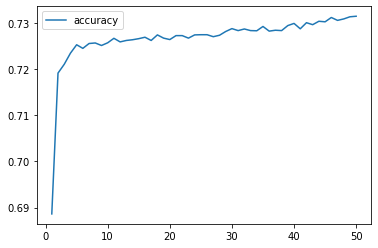

In [172]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [68]:
# Export our model to HDF5 file
nn_model.save("Resources/charity_model_output.h5")